## 1.Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from factor_analyzer import FactorAnalyzer

## Research Quesiton: 
Can we categorize the 34 skill-feature variables into higher-level groups in which the variables are correlated, to make the features more interpretable?

We will look into thies question using exploratory factor analysis.

## 2.Data

In [2]:
# import data
pd.set_option('display.max_columns', None)
fifa = pd.read_csv(r'/Users/gin/Documents/MSIM@UIUC/IS507/assignments/final project/FIFA-19-complete dataset.csv',
                   encoding = 'UTF-8', index_col=0)
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2.1.Data Structure

In [3]:
fifa.shape

(18207, 88)

There are 88 columns and 18207 observations on data.

In [4]:
# check for missing values
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [5]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [6]:
df_feature = fifa[['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing','Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing','BallControl', 'Acceleration',
       'SprintSpeed', 'Agility','Reactions','Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots','Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving','GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]
df_feature.shape

(18207, 34)

In [7]:
df_feature.dropna(how='any', axis=0, inplace=True)
df_feature.shape

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(18159, 34)

In [8]:
df_position = fifa['Position']
df_position.dropna(how='any', axis=0, inplace=True)
df_position.shape
# goalkeeping positions


(18147,)

In [9]:
goal_pos = ["GK"]
# defensive positions
def_pos = ["CB", "LB", "RB", "LWB", "RWB", "RCB", "LCB"]
# midfield positions
mid_pos = ["CDM", "RDM", "LDM", "CAM", "LAM", "RAM", "CM", "LM", "RM", "RW", "LW", "RCM", "LCM"]
# attacking positions
att_pos = ["CF", "ST", "LF", "RF", "LS", "RS"]

Here for our variables of interest, there are 18147 observations of non-missing values.


## 3.Factorability Test

### Bartlett’s test of sphericity 

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df_feature)
chi_square_value, p_value

(1028259.283041999, 0.0)

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all.  If the test found statistically insignificant, you should not employ a factor analysis.

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

### Kaiser-Meyer-Olkin Test

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_feature)

kmo_model

0.9736259569642389

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

The overall KMO for our data is 0.97, which is excellent. I can proceed with our planned factor analysis.

## 4.Choosing the Number of Factors

In [12]:
# Create factor analysis object and perform factor analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer 
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df_feature)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([18.8481062 ,  4.91055413,  2.51108139,  1.7065588 ,  1.30919969,
        0.62750523,  0.43928806,  0.35948571,  0.30146142,  0.27676152,
        0.24895143,  0.23251046,  0.22331826,  0.20543427,  0.20034521,
        0.18329491,  0.17018507,  0.13862622,  0.12831962,  0.12452654,
        0.11821074,  0.10760677,  0.09255437,  0.08334251,  0.07218029,
        0.06826452,  0.06511216,  0.06139402,  0.03753378,  0.03729349,
        0.03104066,  0.0303835 ,  0.0266327 ,  0.02293634])

<function matplotlib.pyplot.show(*args, **kw)>

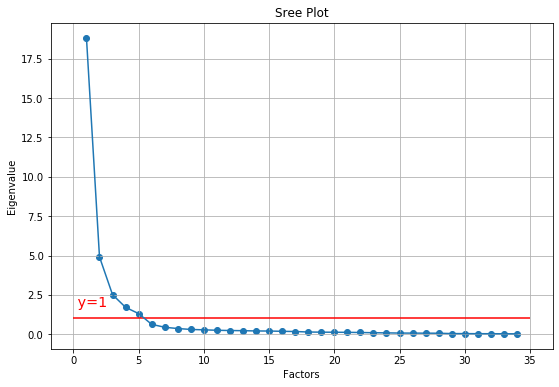

In [13]:
plt.figure(figsize=(9, 6))
plt.scatter(range(1,df_feature.shape[1]+1),ev)
plt.plot(range(1,df_feature.shape[1]+1),ev)

plt.hlines(1,0,35, colors='red')
plt.text(0, 2, ' y=1', ha='left', va='center', color='red', fontsize='x-large')

plt.title('Sree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show

From the results above, we can notice there are 5 eigenvalues greater than 1 so I can choose 5 factors.

## 5.Performing Factor Analysis

Text(0.5, 1, 'Correlation Plot of skill variables')

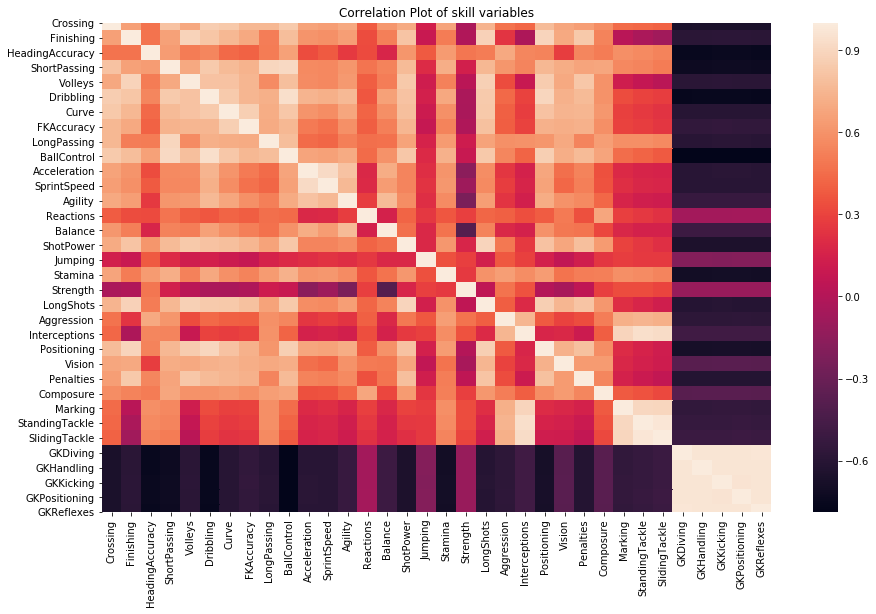

In [14]:
plt.figure(figsize=(15,9))
corr= df_feature.corr()
corr_plot = sns.heatmap(corr)
corr_plot.set_title('Correlation Plot of skill variables')

In [15]:
print(corr)

                 Crossing  Finishing  HeadingAccuracy  ShortPassing   Volleys  \
Crossing         1.000000   0.655300         0.469507      0.809660  0.690339   
Finishing        0.655300   1.000000         0.473427      0.661830  0.882675   
HeadingAccuracy  0.469507   0.473427         1.000000      0.640091  0.505639   
ShortPassing     0.809660   0.661830         0.640091      1.000000  0.698309   
Volleys          0.690339   0.882675         0.505639      0.698309  1.000000   
Dribbling        0.856647   0.824337         0.550750      0.843722  0.809639   
Curve            0.833105   0.759229         0.440846      0.775398  0.807285   
FKAccuracy       0.761107   0.697550         0.407772      0.736659  0.749637   
LongPassing      0.756527   0.512806         0.510779      0.895722  0.571050   
BallControl      0.840916   0.788376         0.658175      0.911451  0.794935   
Acceleration     0.668365   0.606378         0.329647      0.565752  0.572064   
SprintSpeed      0.645578   

In [16]:
fa = FactorAnalyzer(n_factors=5, rotation='varimax')

In [17]:
# Fit the model using squared moltiple correlation
fa.fit(X = df_feature)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

In [18]:
fa.loadings_

array([[ 0.68789929,  0.34965412,  0.25068048,  0.39448371, -0.06274242],
       [ 0.80428005, -0.20712616,  0.37972608,  0.24589053,  0.1206772 ],
       [ 0.33040574,  0.37078152,  0.59105159, -0.00778494,  0.52056895],
       [ 0.72345746,  0.45876253,  0.30482818,  0.22588925,  0.07241784],
       [ 0.8249664 , -0.08261051,  0.33241999,  0.20242109,  0.1259453 ],
       [ 0.74516873,  0.16764401,  0.39706609,  0.42343988,  0.01289569],
       [ 0.82347406,  0.17045957,  0.23143739,  0.27757247, -0.04976412],
       [ 0.80448091,  0.20128113,  0.20320577,  0.16489118, -0.08028716],
       [ 0.67738909,  0.56051093,  0.15168415,  0.15147596, -0.02521298],
       [ 0.75065539,  0.28692147,  0.40778137,  0.32126624,  0.10513409],
       [ 0.36693715,  0.03770773,  0.29339898,  0.82035589,  0.06705631],
       [ 0.34517224,  0.04229813,  0.32095617,  0.76490773,  0.14112648],
       [ 0.52481066,  0.05402897,  0.16498948,  0.71966019, -0.03930347],
       [ 0.56109398,  0.2688917 , -0.3

In [19]:
column_names= ['Factor1','Factor2','Factor3','Factor4','Factor5']
df_fa = pd.DataFrame(fa.loadings_, columns=column_names, index=[df_feature.columns])
df_fa

,Factor1,Factor2,Factor3,Factor4,Factor5
Crossing,0.687899,0.349654,0.250680,0.394484,-0.062742
Finishing,0.804280,-0.207126,0.379726,0.245891,0.120677
HeadingAccuracy,0.330406,0.370782,0.591052,-0.007785,0.520569
ShortPassing,0.723457,0.458763,0.304828,0.225889,0.072418
Volleys,0.824966,-0.082611,0.332420,0.202421,0.125945
Dribbling,0.745169,0.167644,0.397066,0.423440,0.012896
Curve,0.823474,0.170460,0.231437,0.277572,-0.049764
FKAccuracy,0.804481,0.201281,0.203206,0.164891,-0.080287
LongPassing,0.677389,0.560511,0.151684,0.151476,-0.025213
BallControl,0.750655,0.286921,0.407781,0.321266,0.105134


In [27]:
df_fa.sort_values('Factor1', ascending=False, inplace=False)

,Factor1,Factor2,Factor3,Factor4,Factor5
LongShots,0.857564,0.033145,0.302291,0.202628,0.093248
Vision,0.842124,0.118875,-0.017305,0.197364,-0.043420
Volleys,0.824966,-0.082611,0.332420,0.202421,0.125945
Curve,0.823474,0.170460,0.231437,0.277572,-0.049764
FKAccuracy,0.804481,0.201281,0.203206,0.164891,-0.080287
Finishing,0.804280,-0.207126,0.379726,0.245891,0.120677
ShotPower,0.791748,0.102876,0.367112,0.142614,0.201858
Positioning,0.777154,0.004928,0.378275,0.345909,0.105387
Penalties,0.757857,-0.059338,0.401678,0.158659,0.131167
BallControl,0.750655,0.286921,0.407781,0.321266,0.105134


The higher a factor loading, the more important a variable is for said factor. A loading cutoff of 0.5 will be used here. This cutoff determines which variables belong to which factor.

In [21]:
df_fa['Factor1'][df_fa['Factor1'].abs() > 0.55]

Crossing        0.687899
Finishing       0.804280
ShortPassing    0.723457
Volleys         0.824966
Dribbling       0.745169
Curve           0.823474
FKAccuracy      0.804481
LongPassing     0.677389
BallControl     0.750655
Reactions       0.561094
ShotPower       0.791748
LongShots       0.857564
Positioning     0.777154
Vision          0.842124
Penalties       0.757857
Composure       0.691871
Name: Factor1, dtype: float64

In [22]:
df_fa['Factor2'][df_fa['Factor2'].abs() > 0.5]

LongPassing       0.560511
Aggression        0.654878
Interceptions     0.925791
Marking           0.871847
StandingTackle    0.943461
SlidingTackle     0.941927
Name: Factor2, dtype: float64

In [23]:
df_fa['Factor3'][df_fa['Factor3'].abs() > 0.5]

HeadingAccuracy    0.591052
GKDiving          -0.808178
GKHandling        -0.807835
GKKicking         -0.801819
GKPositioning     -0.810478
GKReflexes        -0.808818
Name: Factor3, dtype: float64

In [24]:
df_fa['Factor4'][df_fa['Factor4'].abs() > 0.5]

Acceleration    0.820356
SprintSpeed     0.764908
Agility         0.719660
Balance         0.667503
Name: Factor4, dtype: float64

In [25]:
df_fa[df_fa['Factor5'] > 0.7]

,Factor1,Factor2,Factor3,Factor4,Factor5


In [26]:
df_fa.ix[df_mrg.contact==“A”,'contact'] = None

SyntaxError: invalid character in identifier (<ipython-input-26-a6e50e37ff56>, line 1)

In [34]:
fa2 = FactorAnalyzer(n_factors=4, rotation='varimax')
# Fit the model using squared moltiple correlation
fa2.fit(X = df_feature)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

In [35]:
column_names= ['Factor1','Factor2','Factor3','Factor4']
df_fa2 = pd.DataFrame(fa2.loadings_, columns=column_names, index=[df_feature.columns])
df_fa2

,Factor1,Factor2,Factor3,Factor4
Crossing,0.661774,0.350130,0.288447,0.408163
Finishing,0.824261,-0.157571,0.435397,0.126219
HeadingAccuracy,0.378498,0.481732,0.614634,-0.270889
ShortPassing,0.698232,0.481215,0.331448,0.200160
Volleys,0.836363,-0.035950,0.380053,0.101300
Dribbling,0.739662,0.191101,0.449976,0.368902
Curve,0.793702,0.176125,0.266488,0.290602
FKAccuracy,0.753669,0.196138,0.224038,0.216440
LongPassing,0.624590,0.551672,0.164049,0.204795
BallControl,0.746704,0.324648,0.452655,0.242292


In [30]:
df_fa2[df_fa2['Factor1'].abs() > 0.6]

,Factor1,Factor2,Factor3,Factor4
Crossing,0.661774,0.350130,0.288447,0.408163
Finishing,0.824261,-0.157571,0.435397,0.126219
ShortPassing,0.698232,0.481215,0.331448,0.200160
Volleys,0.836363,-0.035950,0.380053,0.101300
Dribbling,0.739662,0.191101,0.449976,0.368902
Curve,0.793702,0.176125,0.266488,0.290602
FKAccuracy,0.753669,0.196138,0.224038,0.216440
LongPassing,0.624590,0.551672,0.164049,0.204795
BallControl,0.746704,0.324648,0.452655,0.242292
Reactions,0.630325,0.348707,-0.274065,-0.119969


In [31]:
df_fa2[df_fa2['Factor2'].abs() > 0.6]

,Factor1,Factor2,Factor3,Factor4
Aggression,0.308113,0.731722,0.291909,-0.140930
Interceptions,0.075654,0.946839,0.132184,0.011428
Marking,0.069527,0.892696,0.232197,0.029584
StandingTackle,0.015764,0.950742,0.203735,0.039797
SlidingTackle,-0.026039,0.945039,0.191179,0.065942


In [32]:
df_fa2[df_fa2['Factor3'].abs() > 0.6]

,Factor1,Factor2,Factor3,Factor4
HeadingAccuracy,0.378498,0.481732,0.614634,-0.270889
GKDiving,-0.323278,-0.366524,-0.829200,-0.194703
GKHandling,-0.320065,-0.367145,-0.829390,-0.196993
GKKicking,-0.318311,-0.367450,-0.823882,-0.196996
GKPositioning,-0.316467,-0.361685,-0.830921,-0.199262
GKReflexes,-0.320665,-0.366553,-0.829645,-0.197918


In [33]:
df_fa2[df_fa2['Factor4'].abs() > 0.6]

,Factor1,Factor2,Factor3,Factor4
Acceleration,0.442626,0.079988,0.393320,0.614544
Agility,0.562307,0.070796,0.251286,0.633002
Balance,0.404727,0.080197,0.250075,0.700015


## 6.Check Reliability

In [ ]:
!pip install pingouin
import pingouin as pg
#Create the factors

#fa1: Technical features
factor1 = df_feature[['Crossing', 'Finishing', 'ShortPassing', 'Volleys', 'Dribbling',
             'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Reactions',
              'ShotPower', 'LongShots','Positioning', 'Vision', 'Penalties', 
             'Composure']]
#fa2: Strategy features
factor2 = df_feature[['Aggression', 'Interceptions', 'Marking', 'StandingTackle',
             'SlidingTackle']]
#fa3: GoalKepper
factor3 = df_feature[['HeadingAccuracy', 'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
#fa4: Physical features
factor4 = df_feature[['Acceleration', 'SprintSpeed', 'Agility', 'Balance']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
factor4_alpha = pg.cronbach_alpha(factor4)
print(factor1_alpha, factor2_alpha, factor3_alpha, factor4_alpha)

In [ ]:
print(factor1_alpha)
print(factor2_alpha)
print(factor3_alpha)
print(factor4_alpha)


Now, that's great, but how do we know if our factors are any good? Well, the Cronbach alpha can be used to measure whether or not the variables of a factor form a “coherent” and reliable factor. A value above 0.6 for the alpha is in practice deemed acceptable. Here is the code to get the Cronbach alpha using the pingouin package.

hich indicates that they are useful and coherent. We could use these new factors as variable for other analysis or for prediction. 